In [505]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plot_likert

In [214]:
PA = pd.read_csv('Files/CR-studentexperiences.csv', header = 1)
SA = pd.read_csv('Files/CR-shortanswer.csv')

**Q1** Will the time taken for the users to enter a set of characters using Character Recorder be roughly the same as the time taken using Excel?

In [59]:
EX = pd.to_datetime(PA["end.1"][9:]) - pd.to_datetime(PA["start.1"][9:])
CR = pd.to_datetime(PA["end.2"][9:]) - pd.to_datetime(PA["start.2"][9:])

Timedelta('0 days 00:08:07.333333333')

<AxesSubplot:ylabel='Frequency'>

Text(0.5, 1.0, "Participant's Excel behavior distribution")

Text(0.5, 0, 'Times (seconds)')

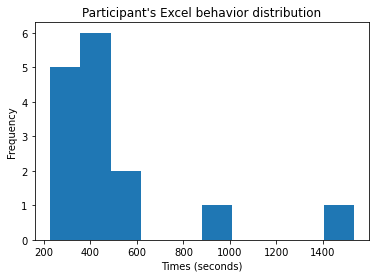

In [60]:
EX.mean()
EX.astype('timedelta64[s]').plot.hist()

plt.title("Participant's Excel behavior distribution")
plt.xlabel("Times (seconds)") 
plt.savefig(os.path.join('Pics/Guilding Analysis/EX-behavior.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

Timedelta('0 days 00:12:44.466666666')

<AxesSubplot:ylabel='Frequency'>

Text(0.5, 1.0, "Participant's Character recorder behavior distribution")

Text(0.5, 0, 'Times (seconds)')

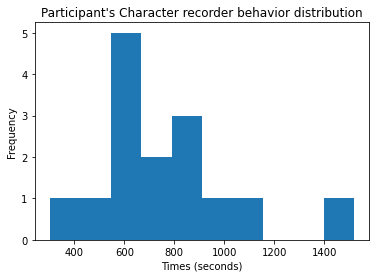

In [61]:
CR.mean()
CR.astype('timedelta64[s]').plot.hist()

plt.title("Participant's Character recorder behavior distribution")
plt.xlabel("Times (seconds)") 
plt.savefig(os.path.join('Pics/Guilding Analysis/CR-behavior.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

We find out that the main value can not represent the user's time spent on the software based on the graph. So we will keep using the Box chart to explore more information. 

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe5d8680670>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe5d8680d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe5d8680370>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe5d868b430>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe5d868b790>,
 'means': []}

([<matplotlib.axis.XTick at 0x7fe5d8658cd0>,
 [Text(1, 0, 'Excel'), Text(2, 0, 'Character Recorder')])

Text(0.5, 1.0, 'Boxplot for Excel and Character Recorder')

Text(0, 0.5, 'time spent')

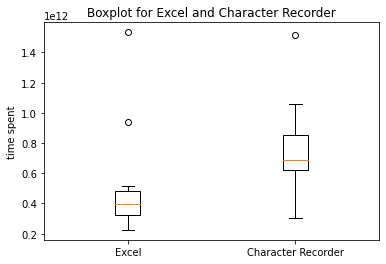

In [62]:
data_1 = EX
data_2 = CR
data = [data_1, data_2]

plt.boxplot(data)
plt.xticks([1, 2], ["Excel", "Character Recorder"])
plt.title("Boxplot for Excel and Character Recorder")
plt.ylabel("time spent")
plt.savefig(os.path.join('Pics/Guilding Analysis/Boxplot.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()


After we look through Boxplot, we find out that there are two outliers in EX and one in CR. So, in the next step, We will remove those outliers and get their mean and median time.

In [63]:
def outlier_remove(col):

    mid = col.quantile(0.75) - col.quantile(0.25)

    top = col.quantile(0.75) + 1.5 * mid
    bot = col.quantile(0.25) - 1.5 * mid

    def remove(x):
        if x <= top and x >= bot:
            return x

    return col.map(remove)

In [64]:
New_CR = outlier_remove(CR).dropna()
New_EX = outlier_remove(EX).dropna()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe5c8cb2e20>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe5c8cc0550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe5c8cb2ac0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe5c8cc0c10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe5c8cc0f70>,
 'means': []}

([<matplotlib.axis.XTick at 0x7fe5c8b97550>,
 [Text(1, 0, 'New Excel'), Text(2, 0, 'New Character Recorder')])

Text(0.5, 1.0, 'Boxplot for Excel and Character Recorder')

Text(0, 0.5, 'time spent')

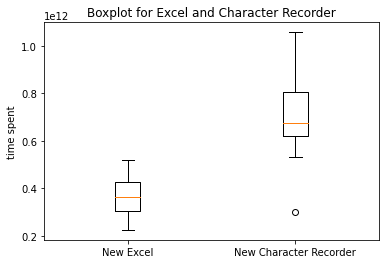

In [65]:
data_1 = New_EX
data_2 = New_CR
data = [data_1, data_2]

plt.boxplot(data)
plt.xticks([1, 2], ["New Excel", "New Character Recorder"])
plt.title("Boxplot for Excel and Character Recorder")
plt.ylabel("time spent")
plt.savefig(os.path.join('Pics/Guilding Analysis/New-Boxplot.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

In [66]:
print('Excel Median time spent : ' + str(New_EX.median()))
print('Excel Mean time spent : ' +  str(New_EX.mean()))

Excel Median time spent : 0 days 00:06:04
Excel Mean time spent : 0 days 00:06:11.846153846


In [67]:
print('Character Recorder Median time spent : ' + str(New_CR.median()))
print('Character Recorder Mean time spent : ' +  str(New_CR.mean()))

Character Recorder Median time spent : 0 days 00:11:14.500000
Character Recorder Mean time spent : 0 days 00:11:50.571428571


After we delete outlier, we will get the t-test result

In [68]:
stats.ttest_rel(EX, CR)

Ttest_relResult(statistic=-2.4552412459617647, pvalue=0.02776240255818241)

**Q2** Will the data entered using Character Recorder be more consistent than the data entered using Excel? 

**Q3** Will the user add new terms to the ontology while using Character Recorder? If so, how often?

<Figure size 648x504 with 0 Axes>

<AxesSubplot:ylabel='use my terms'>

Text(0.5, 1.0, 'How many new term add by participants in research')

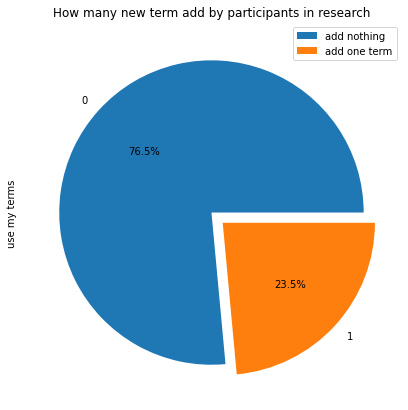

In [556]:
plt.figure(figsize=[9,7])
PA["use my terms"][1:].dropna().value_counts().plot.pie(explode = (0, 0.1), autopct='%1.1f%%')
plt.title("How many new term add by participants in research")

plt.legend(['add nothing', 'add one term'])
plt.show()

**Q4** Will the terms added by different users to the ontology create conflicts in the ontology? If so, what kinds of conflict? and what are their relative frequency? 

**Q5** Will the user find the software intuitive to use and instructions clear and easy to follow?

As for answering this question. firstly, we should draw bar chart for each question. 

In [313]:
def missing_fill(question):

    if "almost always" not in question.keys():
        fill = pd.Series([0], index = ["almost always"])
        question = question.add(fill, fill_value=0)
    
    if "sometimes" not in question.keys():
        fill = pd.Series([0], index = ["sometimes"])
        question = question.add(fill, fill_value=0)
    
    if "rarely" not in question.keys():
        fill = pd.Series([0], index = ["rarely"])
        question = question.add(fill, fill_value=0)
    
    else:
        question = question

    return question

In [265]:
def missing_fill_2(question):

    if "good" not in question.keys():
        fill = pd.Series([0], index = ["good"])
        question = question.add(fill, fill_value=0)
    
    if "fair" not in question.keys():
        fill = pd.Series([0], index = ["fair"])
        question = question.add(fill, fill_value=0)
    
    if "poor" not in question.keys():
        fill = pd.Series([0], index = ["poor"])
        question = question.add(fill, fill_value=0)
    
    else:
        question = question

    return question

Q2#1 - Your experience with the main components of Character Recorder: - Did what I wanted it to do

In [336]:
def draw(value, group, Width):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
   
    barWidth = Width
    br = np.arange(3)
    
    for i in range(1, 6):
        q = value["Q2#" + str(group) + "_" +str(i)][19:34].value_counts()

        ax.bar(br, missing_fill(q)[['almost always', 'sometimes', 'rarely']], width = 0.25, label = value["Q2#" + str(group) + "_" +str(i)][0].split("-")[2])
        br = [x + barWidth for x in br]
        ax.legend()

    plt.xticks([r + barWidth for r in range(3)],
        ['almost always', 'sometimes', 'rarely'])

Text(0.5, 1.0, "User's experiences - Did what I wanted it to do")

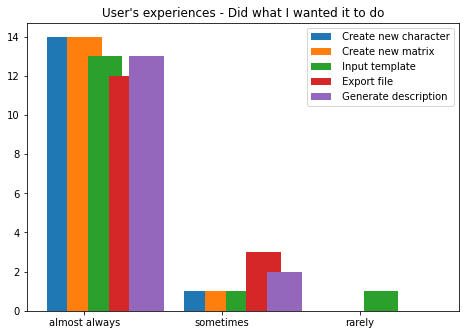

In [335]:
draw(SA, 1, 0.15)
plt.title("User's experiences - Did what I wanted it to do")

Q2#2 - Your experience with the main components of Character Recorder: - Responded quickly

Text(0.5, 1.0, "User's experiences - Responded quickly")

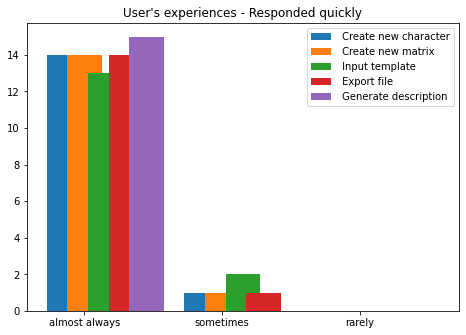

In [338]:
draw(SA, 2, 0.15)
plt.title("User's experiences - Responded quickly")

Q2#3 - Your experience with the main components of Character Recorder: - My experience with it was

In [339]:
def draw2(value, group, Width):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    barWidth = Width
    br = np.arange(3)
    
    for i in range(1, 6):
        q = value["Q2#" + str(group) + "_" +str(i)][19:34].value_counts()

        ax.bar(br, missing_fill_2(q)[['good', 'fair', 'poor']], width = 0.25, label = value["Q2#" + str(group) + "_" +str(i)][0].split("-")[2])
        br = [x + barWidth for x in br]
        ax.legend()

    plt.xticks([r + barWidth for r in range(3)],
        ['good', 'fair', 'poor'])

Text(0.5, 1.0, "User's experiences - My experience with it was")

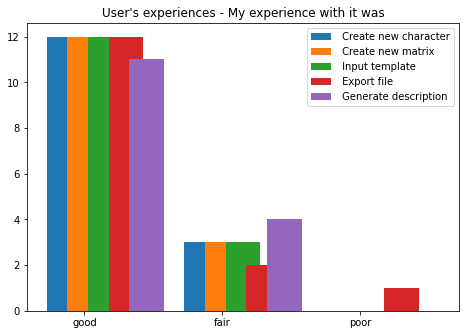

In [340]:
draw2(SA, 3, 0.15)
plt.title("User's experiences - My experience with it was")

Q3 - Your experience with features of Character Recorder (CR):

In [ ]:
for i in Q1.keys():
    print(i)

almost always
sometimes


In [415]:
def missing_fill_3(question):

    if "Strongly agree" not in question.keys():
        fill = pd.Series([0], index = ["Strongly agree"])
        question = question.add(fill, fill_value=0)
    
    if "Agree" not in question.keys():
        fill = pd.Series([0], index = ["Agree"])
        question = question.add(fill, fill_value=0)
    
    if "Somewhat agree" not in question.keys():
        fill = pd.Series([0], index = ["Somewhat agree"])
        question = question.add(fill, fill_value=0)
    
    if "Neither agree nor disagree" not in question.keys():
        fill = pd.Series([0], index = ["Neither agree nor disagree"])
        question = question.add(fill, fill_value=0)
    
    if "Somewhat disagree" not in question.keys():
        fill = pd.Series([0], index = ["Somewhat disagree"])
        question = question.add(fill, fill_value=0)
    
    if "Disagree" not in question.keys():
        fill = pd.Series([0], index = ["Disagree"])
        question = question.add(fill, fill_value=0)
    
    if "Strongly disagree" not in question.keys():
        fill = pd.Series([0], index = ["Strongly disagree"])
        question = question.add(fill, fill_value=0)

    else:
        question = question

    return question

In [500]:
def draw3(value, Width, xlabel, start, end):
    fig = plt.figure(figsize=[15, 15])
    ax = fig.add_axes([0,0,1,1])

    barWidth = Width
    br = np.arange(7)
    
    for i in range(start, end):
        q = value["Q3_" + str(i)][19:34].value_counts()

        ax.bar(br, missing_fill_3(q), width = 0.1, label = value["Q3_" + str(i)][0].split("-")[1])
        ax.margins(x=0.1)
        br = [x + barWidth for x in br]
        ax.legend()
        #ax.legend(title='Columns', bbox_to_anchor=(1, 1.02), loc='upper left')
    
    plt.xticks([r + barWidth for r in range(7)],
        xlabel)

Text(0.5, 1.0, "User's experience with features of Character Recorder (CR) Part one")

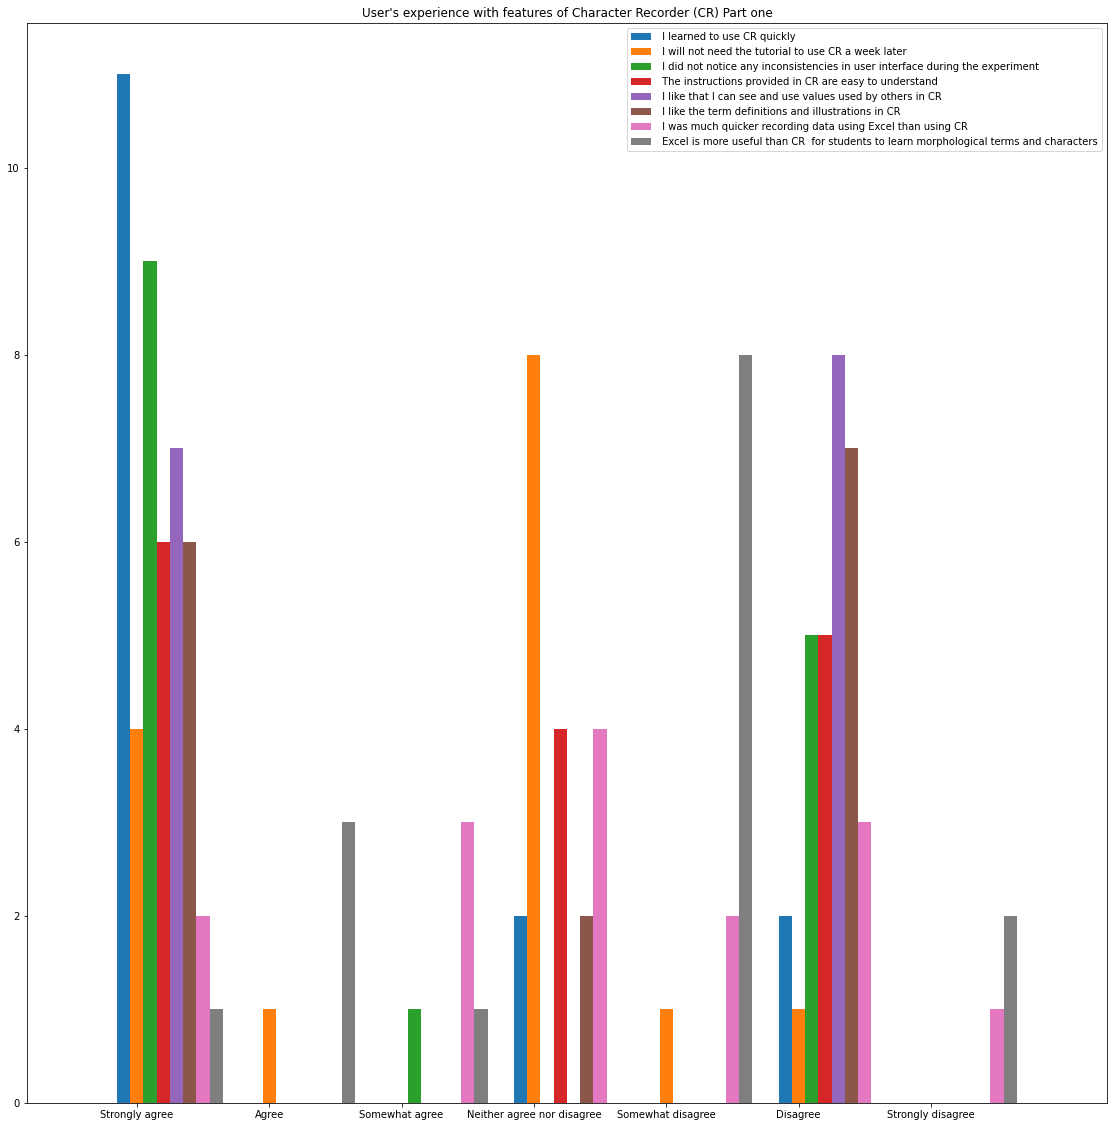

In [503]:
a = ['Strongly agree','Agree', 'Somewhat agree', 'Neither agree nor disagree',
       'Somewhat disagree', 'Disagree', 'Strongly disagree']


draw3(SA, 0.1, a, 1, 9)
plt.title("User's experience with features of Character Recorder (CR) Part one")

Text(0.5, 1.0, "User's experience with features of Character Recorder (CR) Part two")

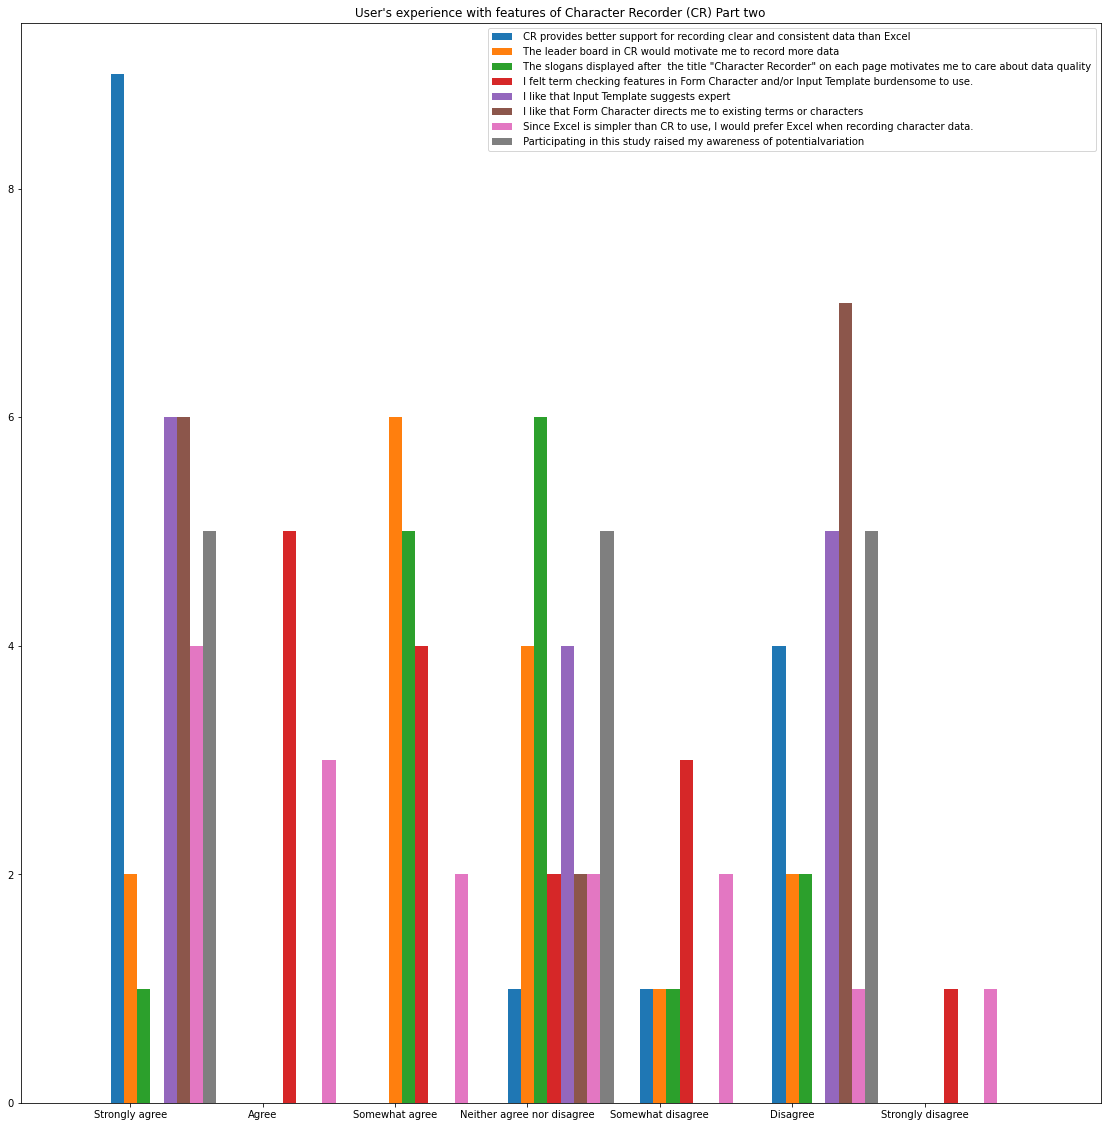

In [504]:
draw3(SA, 0.1, a, 9, 17)
plt.title("User's experience with features of Character Recorder (CR) Part two")

Q14 - Your perceived task load with Character Recorder (CR)

In [540]:
df = pd.DataFrame(SA[["Q14_1", "Q14_2", "Q14_3", "Q14_4"]][19:34], columns=["Q14_1", "Q14_2", "Q14_3", "Q14_4"])
df.rename(columns={'Q14_1': "Mental Demand", 'Q14_2': 'Performance', 'Q14_3': 'Effort', 'Q14_4': 'Frustration'}, inplace=True)

df

,Mental Demand,Performance,Effort,Frustration
19,3,Much stronger than Excel\n9,4,Much stronger than Excel\n9
20,Same as Excel\n5,8,3,2
21,Same as Excel\n5,Much stronger than Excel\n9,Same as Excel\n5,Same as Excel\n5
22,Same as Excel\n5,4,6,4
23,6,7,7,4
24,Same as Excel\n5,6,4,4
25,8,6,7,6
26,8,6,7,8
27,8,Much stronger than Excel\n9,8,7
28,4,Same as Excel\n5,2,3


In [533]:
scales = ["Much weaker than Excel\n1", "2", "3","4","Same as Excel\n5","6","7","8","Much stronger than Excel\n9"]

<AxesSubplot:xlabel='Percentage of Responses'>

Text(0.5, 1.0, "User's perceived task load with Character Recorder (compare with Excel)")

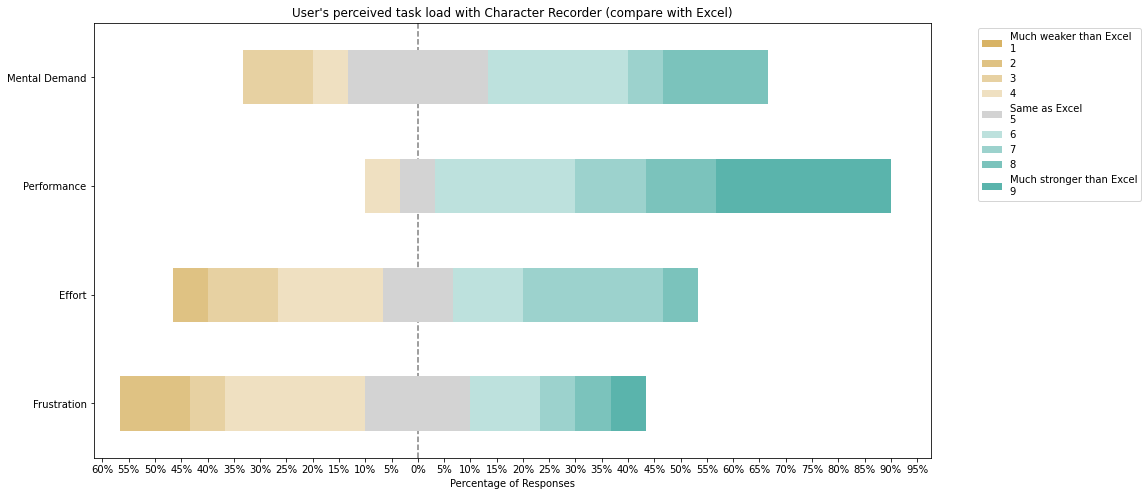

In [554]:
plot_likert.plot_likert(df, scales, plot_percentage=True, figsize=(15,8), colors=plot_likert.colors.likert9)

plt.title("User's perceived task load with Character Recorder (compare with Excel)")